In [1]:
import requests
from bs4 import BeautifulSoup


In [2]:
#Question 1
#home page reached
home_url = "https://community.dur.ac.uk/hubert.shum/comp42315/"
home = requests.get(home_url)
soup = BeautifulSoup(home.content, "html.parser")

In [3]:
#publications by year page reached
navigator=soup.find('div',class_='navigator')
character_animation=navigator.find_all('a')[1]['href']
character_animation_url=home_url+character_animation
CA = requests.get(character_animation_url)
soup=BeautifulSoup(CA.content, "html.parser")

In [4]:
#links of all topics stored in a list
topics_url=[character_animation_url]
pTextOption=soup.find('p',class_='TextOption')
atopics = pTextOption.find_all('a')
for atopic in atopics:
    topic_ext=atopic['href']
    topic_url=home_url+topic_ext
    topics_url.append(topic_url)
topics_url

['https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_characteranimation.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_motionanalysis.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_interactionmodelling.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_3dreconstruction.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_actionrecognition.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_surfacemodelling.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_virtualreality.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_biometrics.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_facemodelling.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_crowdmodelling.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42

In [5]:
webpages=[]
for url in topics_url:
    topic = requests.get(url)
    soup=BeautifulSoup(topic.content,'html.parser')
    textsmalldefaults = soup.find_all("span", class_="TextSmallDefault")
    for block in textsmalldefaults:
        link = block.find('a',class_='LinkButton')
        if link != None:
            webpage_ext = link['href']
            webpage = home_url + str(webpage_ext)
            print(webpage)
            webpages.append(webpage)

https://community.dur.ac.uk/hubert.shum/comp42315/pbl_tvcg2021motionsynthesis.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_tcsvt2021motionprediction.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_cag2021reactivemotion.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_cavw2019emotionanalysis.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_mig2019dancesynthesis.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_ace2017dancedj3d.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_d2at2017emotionsynthesis.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_siggraph2016dancegeneration.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_hhm2016depthsensor.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_pg2015latticemodel.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_casa2014variationsynthesis.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_pg2013topologyik.htm
https://community.dur.ac.uk/hubert

In [6]:
webpages_unique=sorted(set(webpages),key=webpages.index)
webpages_unique #Q1 also serves as a reference for consistency checking

['https://community.dur.ac.uk/hubert.shum/comp42315/pbl_tvcg2021motionsynthesis.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_tcsvt2021motionprediction.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_cag2021reactivemotion.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_cavw2019emotionanalysis.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_mig2019dancesynthesis.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_ace2017dancedj3d.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_d2at2017emotionsynthesis.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_siggraph2016dancegeneration.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_hhm2016depthsensor.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_pg2015latticemodel.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_casa2014variationsynthesis.htm',
 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_pg2013top

In [7]:
#Question 2
#find all titles
import pandas as pd
import numpy as np
import csv
title = []
subtitles=[]
for webpage in range(0,len(webpages_unique)):
    working_page=requests.get(webpages_unique[webpage])
    soup=BeautifulSoup(working_page.content,'html.parser')
    stitle = soup.find('h1').text
    title.append(stitle)

In [8]:
topics_duplicated=[] # duplicated values stored for mapping (topics are not really duplicated)
webpages_duplicated=[]
for topic_url in range(0,len(topics_url)):
    working_page = requests.get(topics_url[topic_url])
    soup=BeautifulSoup(working_page.content,'html.parser')
    topic=soup.find('title').text[:-len('Research Publications | COMP42315 Assignment Site for Crawling')-1:1]
    w3_middles=soup.find_all('div',class_='w3-container w3-cell w3-mobile w3-cell-middle')
    for block in w3_middles:
        single_url=home_url+block.find_all('span',class_='TextSmallDefault')[2].find('a')['href']
        topics_duplicated.append(topic)
        webpages_duplicated.append(single_url)

In [9]:
#convert lists to dataframes with duplicated values removed
c_topic = pd.DataFrame({'Topic':topics_duplicated})
c_webpage = pd.DataFrame({'Webpage':webpages_duplicated})
df0 = pd.concat([c_webpage,c_topic],axis=1,join='outer')
unique_indices = df0.drop_duplicates(subset=['Webpage'], keep='first').index
rows_duplicated = df0.drop(df0.index[unique_indices]) #the second duplication contains the second topic which is useful
df0.drop_duplicates(subset=['Webpage'], keep='first', inplace=True)
df0.reset_index(drop=True, inplace=True)

df1 = pd.merge(df0,rows_duplicated,on='Webpage',how='outer')
unique_indices = df1.drop_duplicates(subset=['Webpage'], keep='first').index
rows_duplicated = df1.drop(df1.index[unique_indices])
df1.drop_duplicates(subset=['Webpage'], keep='first', inplace=True)
df1.reset_index(drop=True, inplace=True)

In [10]:
print(rows_duplicated) #which means that 12th row of df1 is duplicated
df1.drop(index=12)
working_page = requests.get(webpages_unique[11])
soup = BeautifulSoup(working_page.content,'html.parser')
this_title = soup.find('h1').text
print(this_title) #the title indicates that its topic should be 'Topology Analysis'
df1['Topic_z'] = np.NaN
df1.loc[11,'Topic_z'] = 'Topology Analysis'
webpages_unique == df1.Webpage #check consistency

                                              Webpage              Topic_x  \
12  https://community.dur.ac.uk/hubert.shum/comp42...  Character Animation   

              Topic_y  
12  Topology Analysis  
Topology Aware Data-Driven Inverse Kinematics


0      True
1      True
2      True
3      True
4      True
       ... 
105    True
106    True
107    True
108    True
109    True
Name: Webpage, Length: 110, dtype: bool

In [11]:
authors=[]#
titles=[]#
abstracts=[]#
journals=[]#
citations=[]#
impact_factors=[]#
paper_links=[]#
video_links=[]#
dois=[]#
youtube_links=[]#

In [13]:
for page in df1.Webpage:
    soup=BeautifulSoup(requests.get(page).content,'html.parser')
    title=soup.find('h1').text
    titles.append(title)
    abstract=soup.find_all('div',attrs={'style':'margin-left: var(--size-marginleft)'})[0].find('p').text
    abstracts.append(abstract)
    journal=soup.find('em').text[6:]
    journals.append(journal)

    author_raw = soup.find_all('p',class_='TextSmallDefault')[2].text
    author_csv = author_raw[:author_raw.find(', "')].replace(' and ',',')
    author_csv = author_csv.replace(', ',',')
    if author_csv[0]==' ':
        author_csv=author_csv[1:]
    authors.append(author_csv)

    IFC_combined = soup.find('span', class_='TextHighlightDefault').text
    try:
        if len(IFC_combined[IFC_combined.find(': ')+2:IFC_combined.find('#')])==5:
            impact_factor = IFC_combined[IFC_combined.find(': ')+2:IFC_combined.find('#')]
        else:
            impact_factor = np.NaN
    except:
        pass

    try:
        if len(IFC_combined[IFC_combined.find('n: ')+3:IFC_combined.find('## ')])<=3:
            citation = int(IFC_combined[IFC_combined.find('n: ')+3:IFC_combined.find('## ')])
        else:
            citation = np.NaN
    except:
        pass
    impact_factors.append(impact_factor)
    citations.append(citation)

    try:
        video_link=soup.find_all('div',style='margin-left: var(--size-marginleft)')[2].find_all('div', class_='ImgThumbnailDiv')[1].find('a')['href']
    except:
        video_link=np.NaN
        #continue
    video_links.append(video_link)

    try:
        paper_link=soup.find_all('div',style='margin-left: var(--size-marginleft)')[2].find('a')['href']
    except:
        paper_link=np.NaN
        continue
    paper_links.append(paper_link)

    try:
        doi=soup.find_all('div',style='margin-left: var(--size-marginleft)')[2].find_all('div', class_='ImgThumbnailDiv')[2].find('a')['href']
    except:
        doi=np.NaN
        continue
    dois.append(doi)

    try:
        youtube_link=soup.find('iframe',class_='youtube-player')['src']
    except:
        youtube_link=np.NaN
        continue
    youtube_links.append(youtube_link)


In [14]:
df_authors=pd.DataFrame([author.split(",") for author in authors])
df_authors=df_authors.rename(columns={0:'1st author',1:'2nd author',2:'3rd author',3:'4th author',4:'5th author',5:'6th author',6:'7th author'})  
c_title=pd.DataFrame({'title':titles})
c_abstract=pd.DataFrame({'abstract':abstracts})
c_journal=pd.DataFrame({'journal':journals})
c_impact_factor=pd.DataFrame({'impact factor':impact_factors})
c_citation=pd.DataFrame({'citation':citations})
c_paper_link=pd.DataFrame({'paper':paper_links})
c_video_link=pd.DataFrame({'video':video_links})
c_doi=pd.DataFrame({'doi':dois})
c_youtube_link=pd.DataFrame({'youtube':youtube_links})

In [15]:
df_text = pd.concat([c_title,df1,df_authors,c_abstract,c_journal,c_impact_factor,c_citation,c_paper_link,c_video_link,c_doi,c_youtube_link],axis=1)

df_text.to_csv('Question_2.csv')

In [16]:
df_text

,title,Webpage,Topic_x,Topic_y,Topic_z,1st author,2nd author,3rd author,4th author,5th author,6th author,7th author,abstract,journal,impact factor,citation,paper,video,doi,youtube
0,Spatio-temporal Manifold Learning for Human Mo...,https://community.dur.ac.uk/hubert.shum/comp42...,Character Animation,NaN,NaN,He Wang,Edmond S. L. Ho,Hubert P. H. Shum,Zhanxing Zhu,None,None,None,Data-driven modeling of human motions is ubiqu...,IEEE Transactions on Visualization and Compute...,4.579,74.0,publications/tvcg2021deeplearning/files/tvcg20...,publications/tvcg2021deeplearning/files/tvcg20...,http://doi.org/10.1109/TVCG.2019.2936810,https://www.youtube.com/embed/1eZxWkLj1lg
1,A Quadruple Diffusion Convolutional Recurrent ...,https://community.dur.ac.uk/hubert.shum/comp42...,Character Animation,NaN,NaN,Qianhui Men,Edmond S. L. Ho,Hubert P. H. Shum,Howard Leung,None,None,None,Recurrent neural network (RNN) has become popu...,IEEE Transactions on Circuits and Systems for ...,4.685,13.0,publications/tcsvt2021prediction/files/tcsvt20...,publications/tcsvt2021prediction/files/tcsvt20...,publications/tcsvt2021prediction/files/tcsvt20...,https://www.youtube.com/embed/qyE2PuAXXOA
2,GAN-based Reactive Motion Synthesis with Class...,https://community.dur.ac.uk/hubert.shum/comp42...,Character Animation,Interaction Modelling,NaN,Qianhui Men,Hubert P. H. Shum,Edmond S. L. Ho,Howard Leung,None,None,None,Creating realistic characters that can react t...,Computers and Graphics (C&G),1.936,NaN,publications/cag2021reactive/files/cag2021reac...,publications/cag2021reactive/files/cag2021reac...,http://doi.org/10.1016/j.cag.2021.09.014,https://www.youtube.com/embed/Zhmup_GM4zk
3,A Generic Framework for Editing and Synthesizi...,https://community.dur.ac.uk/hubert.shum/comp42...,Character Animation,Face Modelling,NaN,Jacky C. P. Chan,Hubert P. H. Shum,He Wang,Li Yi,Wei Wei,Edmond S. L. Ho,None,Emotion is considered to be a core element in ...,Computer Animation and Virtual Worlds (CAVW),1.020,6.0,publications/cavw2019emotion/files/cavw2019emo...,publications/cavw2019emotion/files/cavw2019emo...,http://doi.org/10.1002/cav.1871,https://www.youtube.com/embed/wbcrC2K4ghc
4,Automatic Sign Dance Synthesis from Gesture-ba...,https://community.dur.ac.uk/hubert.shum/comp42...,Character Animation,NaN,NaN,Naoya Iwamoto,Hubert P. H. Shum,Wakana Asahina,Shigeo Morishima,None,None,None,Automatic dance synthesis has become more and ...,Proceedings of the 2019 International Conferen...,NaN,6.0,publications/mig2019dance/files/mig2019dance.pdf,publications/mig2019dance/files/mig2019dance.wmv,http://doi.org/10.1145/3359566.3360069,https://www.youtube.com/embed/D6D1x0ufZis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Manifold Regularized Experimental Design for A...,https://community.dur.ac.uk/hubert.shum/comp42...,Machine Learning,NaN,NaN,Lining Zhang,Hubert P. H. Shum,Ling Shao,None,None,None,None,Various machine learning and data mining tasks...,IEEE Transactions on Image Processing (TIP),NaN,11.0,publications/tip2016feedback/files/tip2016feed...,http://doi.org/10.1109/TIP.2016.2635440,NaN,NaN
106,Discriminative Semantic Subspace Analysis for ...,https://community.dur.ac.uk/hubert.shum/comp42...,Machine Learning,NaN,NaN,Lining Zhang,Hubert P. H. Shum,Ling Shao,None,None,None,None,Content-based image retrieval (CBIR) has attra...,IEEE Transactions on Image Processing (TIP),NaN,29.0,publications/fuzz2016experience/files/fuzz2016...,http://doi.org/10.1109/TIP.2016.2516947,NaN,NaN
107,Experience-based Rule Base Generation and Adap...,https://community.dur.ac.uk/hubert.shum/comp42...,Machine Learning,NaN,NaN,Jie Li,Hubert P. H. Shum,Xin Fu,Graham Sexton,Longzhi Yang,None,None,Fuzzy modeling has been widely and successfull...,Proceedings of the 2016 IEEE International Con...,NaN,14.0,publications/fuzz2016sparse/files/fuzz2016spar...,http://doi.org/10.1109/FUZZ-IEEE.2016.7737674,NaN,NaN
108,Towards Sparse Rule Base Generation for Fuzzy ...,

In [17]:
#Question 3
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('punkt')
import operator
import math

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bun233\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
raw=[]
for webpage in range(0,len(webpages_unique)):
    working_page=requests.get(webpages_unique[webpage])
    soup=BeautifulSoup(working_page.content,'html.parser')
    title = soup.find('h1').text
    abstract = soup.find('p').text
    raw.append(title)
    raw.append(abstract)

In [19]:
stop_words = stopwords.words('english')
stop_words = stop_words+['.',',',':',';','(',')','new','use','used','using','allows','%','paper','proposed','also']
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
def text_to_documents(raw):
    docs = []
    for text in raw:
        docs.append(word_tokenize(text))
    return docs

documents = text_to_documents(raw)
documents

[['Spatio-temporal',
  'Manifold',
  'Learning',
  'for',
  'Human',
  'Motions',
  'via',
  'Long-horizon',
  'Modeling'],
 ['Data-driven',
  'modeling',
  'of',
  'human',
  'motions',
  'is',
  'ubiquitous',
  'in',
  'computer',
  'graphics',
  'and',
  'computer',
  'vision',
  'applications',
  ',',
  'such',
  'as',
  'synthesizing',
  'realistic',
  'motions',
  'or',
  'recognizing',
  'actions',
  '.',
  'Recent',
  'research',
  'has',
  'shown',
  'that',
  'such',
  'problems',
  'can',
  'be',
  'approached',
  'by',
  'learning',
  'a',
  'natural',
  'motion',
  'manifold',
  'using',
  'deep',
  'learning',
  'on',
  'a',
  'large',
  'amount',
  'data',
  ',',
  'to',
  'address',
  'the',
  'shortcomings',
  'of',
  'traditional',
  'data-driven',
  'approaches',
  '.',
  'However',
  ',',
  'previous',
  'deep',
  'learning',
  'methods',
  'can',
  'be',
  'sub-optimal',
  'for',
  'two',
  'reasons',
  '.',
  'First',
  ',',
  'the',
  'skeletal',
  'information',

In [21]:
def unique_terms(docs):
    words = {} # a dictionary
    for doc in docs:
        for word in doc:
            words[word] = True #set keys as the words with the value of True
    return list(words.keys())

terms0 = unique_terms(documents)
terms0

['Spatio-temporal',
 'Manifold',
 'Learning',
 'for',
 'Human',
 'Motions',
 'via',
 'Long-horizon',
 'Modeling',
 'Data-driven',
 'modeling',
 'of',
 'human',
 'motions',
 'is',
 'ubiquitous',
 'in',
 'computer',
 'graphics',
 'and',
 'vision',
 'applications',
 ',',
 'such',
 'as',
 'synthesizing',
 'realistic',
 'or',
 'recognizing',
 'actions',
 '.',
 'Recent',
 'research',
 'has',
 'shown',
 'that',
 'problems',
 'can',
 'be',
 'approached',
 'by',
 'learning',
 'a',
 'natural',
 'motion',
 'manifold',
 'using',
 'deep',
 'on',
 'large',
 'amount',
 'data',
 'to',
 'address',
 'the',
 'shortcomings',
 'traditional',
 'data-driven',
 'approaches',
 'However',
 'previous',
 'methods',
 'sub-optimal',
 'two',
 'reasons',
 'First',
 'skeletal',
 'information',
 'not',
 'been',
 'fully',
 'utilized',
 'feature',
 'extraction',
 'Unlike',
 'images',
 'it',
 'difficult',
 'define',
 'spatial',
 'proximity',
 'way',
 'networks',
 'applied',
 'Second',
 'time-series',
 'with',
 'strong',
 

In [22]:
terms=[]
for term in terms0:
    if term.lower() not in stop_words:
        terms.append(term)
len(terms)

3586

In [23]:
terms

['Spatio-temporal',
 'Manifold',
 'Learning',
 'Human',
 'Motions',
 'via',
 'Long-horizon',
 'Modeling',
 'Data-driven',
 'modeling',
 'human',
 'motions',
 'ubiquitous',
 'computer',
 'graphics',
 'vision',
 'applications',
 'synthesizing',
 'realistic',
 'recognizing',
 'actions',
 'Recent',
 'research',
 'shown',
 'problems',
 'approached',
 'learning',
 'natural',
 'motion',
 'manifold',
 'deep',
 'large',
 'amount',
 'data',
 'address',
 'shortcomings',
 'traditional',
 'data-driven',
 'approaches',
 'However',
 'previous',
 'methods',
 'sub-optimal',
 'two',
 'reasons',
 'First',
 'skeletal',
 'information',
 'fully',
 'utilized',
 'feature',
 'extraction',
 'Unlike',
 'images',
 'difficult',
 'define',
 'spatial',
 'proximity',
 'way',
 'networks',
 'applied',
 'Second',
 'time-series',
 'strong',
 'multi-modal',
 'temporal',
 'correlations',
 'frames',
 'one',
 'hand',
 'frame',
 'could',
 'followed',
 'several',
 'candidate',
 'leading',
 'different',
 'long-range',
 'depende

In [24]:
def df(term, documents):
    count = 0
    for doc in documents: #document frequency
        if term in doc:
            count += 1
    return count

def idf(term, documents):
    n = len(documents)
    return math.log(n/(df(term, documents)+1)) # +1 in case that df should be 0

In [25]:
tfs=[]
idfs=[]
for term in terms:
    stf=df(term,documents)
    sidf=idf(term,documents)
    tfs.append(stf)
    idfs.append(sidf)

In [26]:
tfidf_list=[]
for m,n in zip(tfs,idfs):
    tfidf=m*n
    tfidf_list.append(tfidf)
tfidf_list

[4.700480365792417,
 8.590030515368504,
 37.59808283350212,
 44.08539420934658,
 12.021999555697413,
 27.819382080224845,
 4.700480365792417,
 4.700480365792417,
 4.700480365792417,
 23.19930203270768,
 58.78921025601646,
 48.354286952874965,
 8.590030515368504,
 53.388275208271985,
 15.136758535673044,
 23.19930203270768,
 69.20583023466631,
 25.571223752129136,
 44.08539420934658,
 15.136758535673044,
 35.809412817582334,
 18.009340385621535,
 42.55534840375534,
 18.009340385621535,
 25.571223752129136,
 4.700480365792417,
 55.65842197678326,
 25.571223752129136,
 69.82646248960984,
 18.009340385621535,
 35.809412817582334,
 42.55534840375534,
 23.19930203270768,
 67.89427505082872,
 18.009340385621535,
 8.590030515368504,
 27.819382080224845,
 29.957322735539908,
 40.966627236738326,
 64.9735313051611,
 37.59808283350212,
 64.9735313051611,
 20.68630438378229,
 56.73728805824484,
 4.700480365792417,
 23.19930203270768,
 20.68630438378229,
 54.54255768904884,
 18.009340385621535,
 8.

In [27]:
combined_list = []
for tfidf, term in zip(tfidf_list, terms):
    combined_list.append([tfidf, term])
combined_list

[[4.700480365792417, 'Spatio-temporal'],
 [8.590030515368504, 'Manifold'],
 [37.59808283350212, 'Learning'],
 [44.08539420934658, 'Human'],
 [12.021999555697413, 'Motions'],
 [27.819382080224845, 'via'],
 [4.700480365792417, 'Long-horizon'],
 [4.700480365792417, 'Modeling'],
 [4.700480365792417, 'Data-driven'],
 [23.19930203270768, 'modeling'],
 [58.78921025601646, 'human'],
 [48.354286952874965, 'motions'],
 [8.590030515368504, 'ubiquitous'],
 [53.388275208271985, 'computer'],
 [15.136758535673044, 'graphics'],
 [23.19930203270768, 'vision'],
 [69.20583023466631, 'applications'],
 [25.571223752129136, 'synthesizing'],
 [44.08539420934658, 'realistic'],
 [15.136758535673044, 'recognizing'],
 [35.809412817582334, 'actions'],
 [18.009340385621535, 'Recent'],
 [42.55534840375534, 'research'],
 [18.009340385621535, 'shown'],
 [25.571223752129136, 'problems'],
 [4.700480365792417, 'approached'],
 [55.65842197678326, 'learning'],
 [25.571223752129136, 'natural'],
 [69.82646248960984, 'motion

In [28]:
def get_freq(mini_list):
    return mini_list[0]

combined_list.sort(key=get_freq, reverse=True)
combined_list

[[79.88601612305652, 'propose'],
 [74.44610548876862, 'results'],
 [73.56157521631765, 'system'],
 [72.59862250528656, 'method'],
 [69.82646248960984, 'motion'],
 [69.20583023466631, 'applications'],
 [67.89427505082872, 'data'],
 [67.89427505082872, 'show'],
 [64.9735313051611, 'However'],
 [64.9735313051611, 'methods'],
 [64.9735313051611, 'based'],
 [63.3538012763688, '3D'],
 [62.501502485340225, 'existing'],
 [61.6198117172946, 'framework'],
 [60.7078395163482, 'applied'],
 [60.7078395163482, 'problem'],
 [60.7078395163482, 'approach'],
 [60.7078395163482, 'features'],
 [59.764640950131685, 'different'],
 [58.78921025601646, 'human'],
 [57.78047477601598, 'demonstrate'],
 [56.73728805824484, 'two'],
 [56.73728805824484, 'algorithm'],
 [55.65842197678326, 'learning'],
 [55.65842197678326, 'work'],
 [55.65842197678326, 'performance'],
 [55.65842197678326, 'Experimental'],
 [54.54255768904884, 'information'],
 [54.54255768904884, 'Kinect'],
 [53.388275208271985, 'computer'],
 [53.3882

In [29]:
for i in range(0,100):
    print(combined_list[i])

[79.88601612305652, 'propose']
[74.44610548876862, 'results']
[73.56157521631765, 'system']
[72.59862250528656, 'method']
[69.82646248960984, 'motion']
[69.20583023466631, 'applications']
[67.89427505082872, 'data']
[67.89427505082872, 'show']
[64.9735313051611, 'However']
[64.9735313051611, 'methods']
[64.9735313051611, 'based']
[63.3538012763688, '3D']
[62.501502485340225, 'existing']
[61.6198117172946, 'framework']
[60.7078395163482, 'applied']
[60.7078395163482, 'problem']
[60.7078395163482, 'approach']
[60.7078395163482, 'features']
[59.764640950131685, 'different']
[58.78921025601646, 'human']
[57.78047477601598, 'demonstrate']
[56.73728805824484, 'two']
[56.73728805824484, 'algorithm']
[55.65842197678326, 'learning']
[55.65842197678326, 'work']
[55.65842197678326, 'performance']
[55.65842197678326, 'Experimental']
[54.54255768904884, 'information']
[54.54255768904884, 'Kinect']
[53.388275208271985, 'computer']
[53.388275208271985, 'games']
[52.19404131561986, 'time']
[50.9581954

In [30]:
#Question 4
from collections import Counter
import matplotlib.pyplot as plt

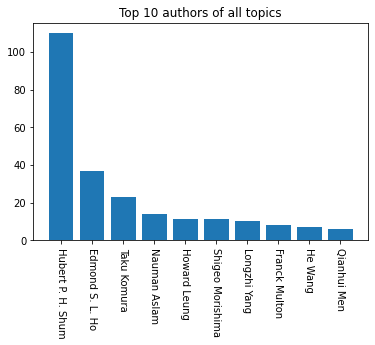

In [31]:
#overall author frequency
authors_duplicated=[] 
for column in df_authors:
    authors_duplicated=authors_duplicated+df_authors[column].values.tolist() # all authors stored in a list

#authors_unique=sorted(set(authors_duplicated),key=authors_duplicated.index)


freq_au = Counter(authors_duplicated)
freq_au_list=list(map(list, freq_au.items())) #frequency of all authors stored in a list of lists

def get_freq(mini_list):
    return mini_list[1]

freq_au_list.sort(key=get_freq, reverse=True)
freq_au_list=freq_au_list[1:] #get rid of none values
overall_most_author=[i[1] for i in freq_au_list[0:10]] #frequencies
oma_name=[i[0] for i in freq_au_list[0:10]] #author names

fig,axs=plt.subplots()
axs.bar(oma_name,overall_most_author)
plt.title('Top 10 authors of all topics')
plt.xticks(rotation=270)
plt.show()

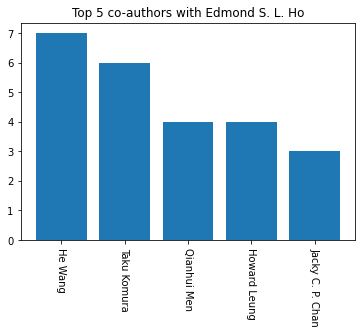

In [32]:
#Edmond S. L. Ho
author_column=['1st author','2nd author','3rd author','4th author','5th author','6th author','7th author']
topics_unique=['Character Animation', 'Motion Analysis', 'Interaction Modelling', '3D Reconstruction', 'Action Recognition', 'Surface Modelling', 'Virtual Reality', 'Biometrics', 'Face Modelling', 'Crowd Modelling', 'Biomedical Engineering', 'Hand and Gesture', 'Robotics', 'Machine Learning', 'Topology Analysis']

#'Topics' and 'Authors' columns perform only as filters (e.g., df.loc[df['Topics/Authors'].str.contains('topic/author'),(columns)])
df_topic_selection=pd.concat([df1,df_authors],axis=1)#.drop(index=110,inplace=False)
df_topic_selection['Topics']=df_topic_selection['Topic_x']+df_topic_selection['Topic_y'].map(str)+df_topic_selection['Topic_z'].map(str)
df_topic_selection['Authors']=df_topic_selection['1st author']+df_topic_selection['2nd author'].map(str)+df_topic_selection['3rd author'].map(str)+df_topic_selection['4th author'].map(str)+df_topic_selection['5th author'].map(str)+df_topic_selection['6th author'].map(str)+df_topic_selection['7th author'].map(str)
df_tp3_ESL=df_topic_selection.loc[df_topic_selection['Authors'].str.contains('Edmond S. L. Ho'),(author_column)]
authors_duplicated_ESL=[]
for column in df_tp3_ESL:
    authors_duplicated_ESL=authors_duplicated_ESL+df_tp3_ESL[column].values.tolist()
freq_ESL=list(map(list,Counter(authors_duplicated_ESL).items()))
freq_ESL.sort(key=get_freq, reverse=True)
freq_ESL=freq_ESL[1:]
overall_ESL=[i[1] for i in freq_ESL[2:7]] #frequencies
co_ESL=[i[0] for i in freq_ESL[2:7]] #author names

fig,axs=plt.subplots()
axs.bar(co_ESL,overall_ESL)
plt.title('Top 5 co-authors with Edmond S. L. Ho')
plt.xticks(rotation=270)
plt.show()

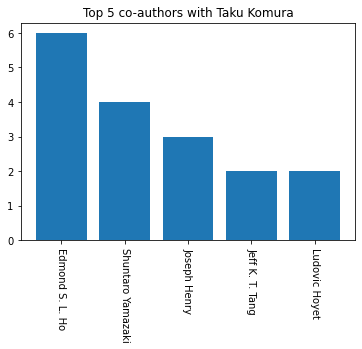

In [33]:
#Taku Komura
df_tp3_TK=df_topic_selection.loc[df_topic_selection['Authors'].str.contains('Taku Komura'),(author_column)]
authors_duplicated_TK=[]
for column in df_tp3_TK:
    authors_duplicated_TK=authors_duplicated_TK+df_tp3_TK[column].values.tolist()
freq_TK=list(map(list,Counter(authors_duplicated_TK).items()))
freq_TK.sort(key=get_freq, reverse=True)
freq_TK=freq_TK[1:]
overall_TK=[i[1] for i in freq_TK[2:7]] #frequencies
co_TK=[i[0] for i in freq_TK[2:7]] #author names

fig,axs=plt.subplots()
axs.bar(co_TK,overall_TK)
plt.title('Top 5 co-authors with Taku Komura')
plt.xticks(rotation=270)
plt.show()

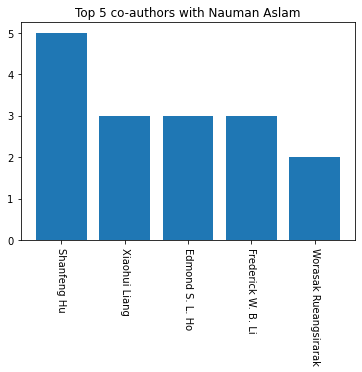

In [34]:
#Nauman Aslam
df_tp3_NA=df_topic_selection.loc[df_topic_selection['Authors'].str.contains('Nauman Aslam'),(author_column)]
authors_duplicated_NA=[]
for column in df_tp3_NA:
    authors_duplicated_NA=authors_duplicated_NA+df_tp3_NA[column].values.tolist()
freq_NA=list(map(list,Counter(authors_duplicated_NA).items()))
freq_NA.sort(key=get_freq, reverse=True)
freq_NA=freq_NA[1:]
overall_NA=[i[1] for i in freq_NA[2:7]] #frequencies
co_NA=[i[0] for i in freq_NA[2:7]] #author names

fig,axs=plt.subplots()
axs.bar(co_NA,overall_NA)
plt.title('Top 5 co-authors with Nauman Aslam')
plt.xticks(rotation=270)
plt.show()

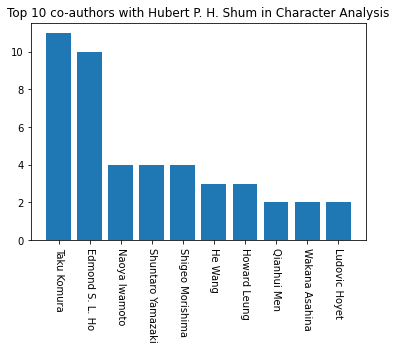

In [36]:
#Character Animation
author_column=['1st author','2nd author','3rd author','4th author','5th author','6th author','7th author']
topics_unique=['Character Animation', 'Motion Analysis', 'Interaction Modelling', '3D Reconstruction', 'Action Recognition', 'Surface Modelling', 'Virtual Reality', 'Biometrics', 'Face Modelling', 'Crowd Modelling', 'Biomedical Engineering', 'Hand and Gesture', 'Robotics', 'Machine Learning', 'Topology Analysis']
#df_topic_selection=pd.concat([df1,df_authors],axis=1).drop(index=110,inplace=False)

df_CA_au=df_text.loc[df_text['Topic_x']=='Character Animation',(author_column)] #as no occurence of character analysis in topic_y or topic_z

authors_duplicated_CA=[]
for column in df_CA_au:
    authors_duplicated_CA=authors_duplicated_CA+df_CA_au[column].values.tolist()

freq_au_CA = Counter(authors_duplicated_CA)
freq_au_CA_list=list(map(list, freq_au_CA.items())) #frequency of all authors stored in a list of lists

freq_au_CA_list.sort(key=get_freq, reverse=True)
freq_au_CA_list=freq_au_CA_list[1:] #get rid of none values
freq_CA=[i[1] for i in freq_au_CA_list[1:11]] #frequencies
FCA=[i[0] for i in freq_au_CA_list[1:11]] #author names

fig,axs=plt.subplots()
axs.bar(FCA,freq_CA)
plt.title('Top 10 co-authors with Hubert P. H. Shum in Character Analysis')
plt.xticks(rotation=270)
plt.show()


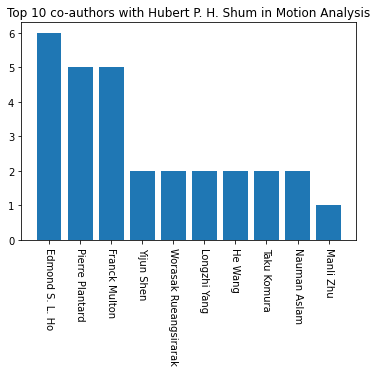

In [37]:
#Motion Analysis
df_tp3_MA=df_topic_selection.loc[df_topic_selection['Topics'].str.contains('Motion Analysis'),(author_column)]
authors_duplicated_MA=[]
for column in df_tp3_MA:
    authors_duplicated_MA=authors_duplicated_MA+df_tp3_MA[column].values.tolist()
freq_MA=list(map(list,Counter(authors_duplicated_MA).items()))
freq_MA.sort(key=get_freq, reverse=True)
freq_MA=freq_MA[1:]
overall_MA=[i[1] for i in freq_MA[1:11]] #frequencies
co_MA=[i[0] for i in freq_MA[1:11]] #author names

fig,axs=plt.subplots()
axs.bar(co_MA,overall_MA)
plt.title('Top 10 co-authors with Hubert P. H. Shum in Motion Analysis')
plt.xticks(rotation=270)
plt.show()

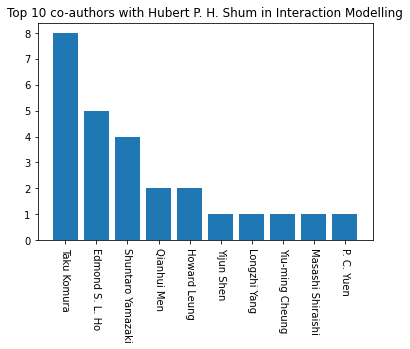

In [38]:
#Interaction Modelling
df_tp3_IM=df_topic_selection.loc[df_topic_selection['Topics'].str.contains('Interaction Modelling'),(author_column)]
authors_duplicated_IM=[]
for column in df_tp3_IM:
    authors_duplicated_IM=authors_duplicated_IM+df_tp3_IM[column].values.tolist()
freq_IM=list(map(list,Counter(authors_duplicated_IM).items()))
freq_IM.sort(key=get_freq, reverse=True)
freq_IM=freq_IM[1:]
overall_IM=[i[1] for i in freq_IM[1:11]] #frequencies
co_IM=[i[0] for i in freq_IM[1:11]] #author names

fig,axs=plt.subplots()
axs.bar(co_IM,overall_IM)
plt.title('Top 10 co-authors with Hubert P. H. Shum in Interaction Modelling')
plt.xticks(rotation=270)
plt.show()

In [39]:
#Question 5
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns


In [40]:
#the number of topics as a feature
topics_list=[]
for r in range(0,110):
    e=df_topic_selection.loc[r][1:4]
    c=[i for i in e]
    topics_list.append(c)

topics_count=[]
for i in topics_list: #np.nan==np.nan returns False
    c=0
    if i[0]==i[0]:
        c=c+1
        if i[1]==i[1]:
            c=c+1
            if i[2]==i[2]:
                c=c+1
    topics_count.append(c)

c_topics_count=pd.DataFrame({'Number of Topics':topics_count})

In [41]:
#the number of authors as a feature
authors_list=[]
for r in range(0,110):
    e=df_topic_selection.loc[r][4:11]
    c=[i for i in e]
    authors_list.append(c)

authors_count=[]
for i in authors_list: #None==None returns True
    c=0
    ii=0
    while i[ii]!=None:
        c=c+1
        ii=ii+1
        if ii==7: # 7 so that the value of ii==6 (the 7th index) is stored
            break
    c=c
    authors_count.append(c)

c_authors_count=pd.DataFrame({'Number of Authors':authors_count})

In [42]:
c_citation_cleaned=c_citation.fillna(0)
c_citation_cleaned.replace('',0,inplace=True)
df_rf_all=pd.concat([c_citation_cleaned,df1['Topic_x'],c_topics_count,df_authors['1st author'],c_authors_count],axis=1)

df_rf_all['citation']=np.where(df_rf_all.citation>50,'high','low')
df_rf_all=pd.get_dummies(df_rf_all)
data_all=df_rf_all.values

#data_all=df_rf_all

In [43]:
y_all=data_all[:,2:4]
x_all=np.concatenate((data_all[:,0:2],data_all[:,4:65]),axis=1)
validation_size = 0.20
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x_all,y_all,test_size=validation_size,random_state=seed)

rf=RandomForestClassifier(n_estimators=1000, max_features=8,random_state=seed)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7727272727272727


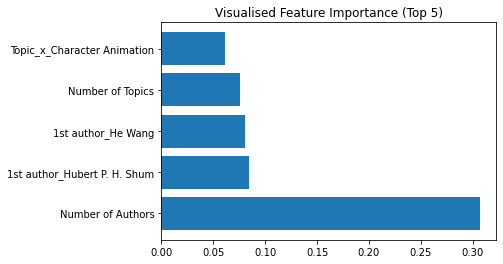

In [44]:
raw_feature_names=[column for column in df_rf_all]
response_names=raw_feature_names[2:4]
predictor_names=raw_feature_names[0:2]+raw_feature_names[4:65]

f_i = list(zip(predictor_names,rf.feature_importances_))
f_i.sort(key = lambda x : x[1],reverse=True)
sfi=f_i[0:5]
#print(f_i)

plt.barh([x[0] for x in sfi],[x[1] for x in sfi])
plt.title('Visualised Feature Importance (Top 5)')
plt.show() # the result indicates that only 'number of authors' should be considered important

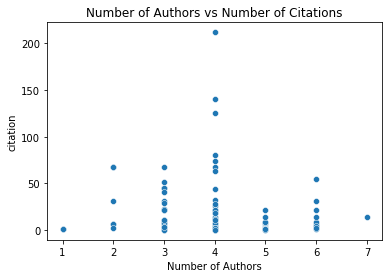

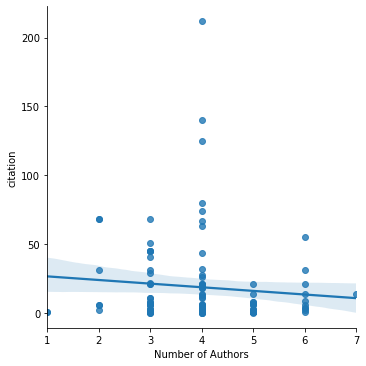

In [45]:
df_authors_scatter=pd.concat([c_authors_count,c_citation_cleaned],axis=1)

ax = sns.scatterplot(x="Number of Authors", y="citation", data=df_authors_scatter)
ax.set_title("Number of Authors vs Number of Citations")
ax.set_xlabel("Number of Authors")
sns.lmplot(x="Number of Authors", y="citation", data=df_authors_scatter)

#Interestingly, the result indicates a slightly negative correlation between the 2 variables. 
#It may be due to the limited scale of datapoints available (e.g., relatively sparse datapoints in 1 and 2 authors versus much denser the ones in 5 and 6).